In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

In [6]:
data=pd.read_csv('Wind_Dataset.csv')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
data.rename(columns = {'LV ActivePower (kW)':'ActivePower(kW)',
                       "Wind Speed (m/s)":"WindSpeed(m/s)",
                       "Wind Direction (°)":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)"},
            inplace = True)
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [8]:

data['Date/Time'] = pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data['year'] = data['Date/Time'].dt.year 
data['month'] = data['Date/Time'].dt.month 
data['day'] = data['Date/Time'].dt.day

In [9]:
data['Hour'] = data['Date/Time'].dt.hour 
data['minute'] = data['Date/Time'].dt.minute 
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [10]:

def mean_speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

In [11]:

data['meanSpeed'] = data['WindSpeed(m/s)'].apply(mean_speed)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5


In [12]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [13]:
data["meanDirection"]=data["WindDirection"].apply(mean_direction)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5,240
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5,210
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5,240
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5,240


In [14]:

directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
  for x in directiondict:
    return directiondict[x]

In [15]:
data['windCDirection'] = data['meanDirection'].apply(wind_direction)


In [16]:
data.head(10)


,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection,windCDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,N
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,N
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,N
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,N
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50,5.5,270,N
6,2018-01-01 01:00:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0,5.5,270,N
7,2018-01-01 01:10:00,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10,5.5,270,N
8,2018-01-01 01:20:00,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20,5.5,240,N
9,2018-01-01 01:30:00,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30,5.5,270,N


In [17]:
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

for i in range(0,12):
    data1T_A=data[data["windCDirection"] == list_yon[i]]
    
    DepGroup_A = data1T_A.groupby("meanSpeed")
    data_T_A = DepGroup_A.mean()
    
    data_T_A.drop(columns = {"WindSpeed(m/s)",
                             "WindDirection",
                             "meanDirection"},
                  inplace = True)
    
    listTA_WS = data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"] = listTA_WS
    
    data_T_A = data_T_A[["WindSpeed(m/s)",
                         "ActivePower(kW)",
                         "TheoreticalPowerCurve(KWh)"]]
    
    data_T_A["Index"] = list(range(1,len(data_T_A.index)+1))

    data_T_A.set_index("Index", inplace = True)
    
    data_T_A = data_T_A.round({'ActivePower(kW)': 2,
                             'TheoreticalPowerCurve(KWh)': 2})
    
    data_T_A["count"] = [len(data1T_A["meanSpeed"][data1T_A["meanSpeed"] == x]) for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)


In [18]:
data_T_N = list_data[0]
data_T_NNE = list_data[1]
data_T_NEE = list_data[2]
data_T_E = list_data[3]
data_T_SEE = list_data[4]
data_T_SSE = list_data[5]
data_T_S = list_data[6]
data_T_SSW = list_data[7]
data_T_SWW = list_data[8]
data_T_W = list_data[9]
data_T_NWW = list_data[10]
data_T_NNW = list_data[11]

list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

In [19]:
def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["TheoreticalPowerCurve(KWh)"],
             label = "Theoretical Power Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["ActivePower(kW)"],
             label = "Actual Power Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Direction towards {}".format(list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.jpeg".format(list_tableName[i]))
    plt.close(fig)

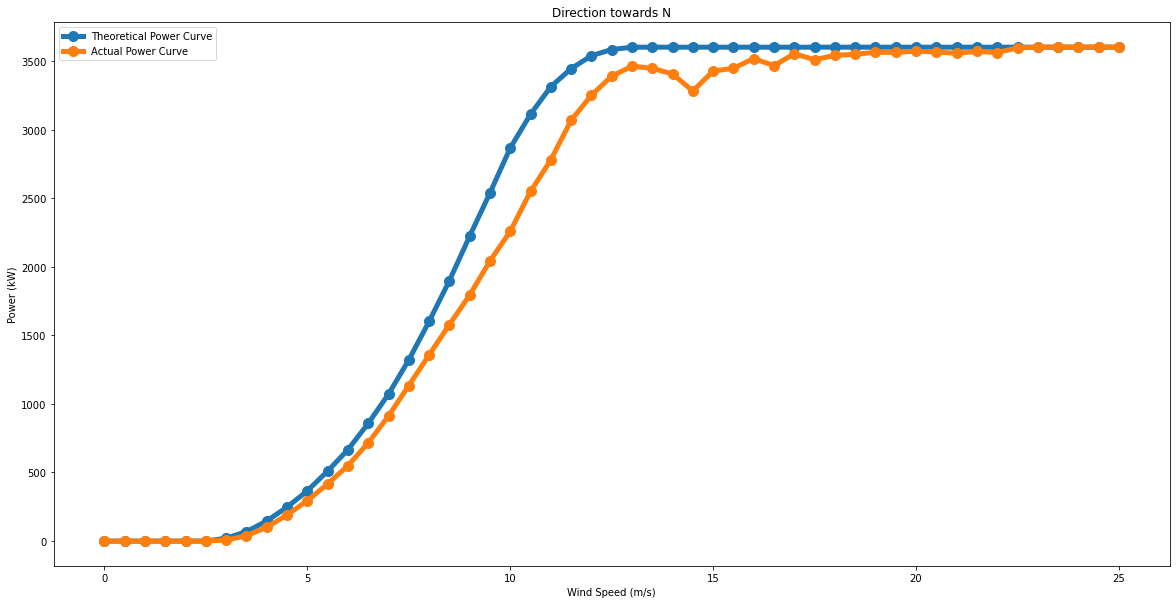

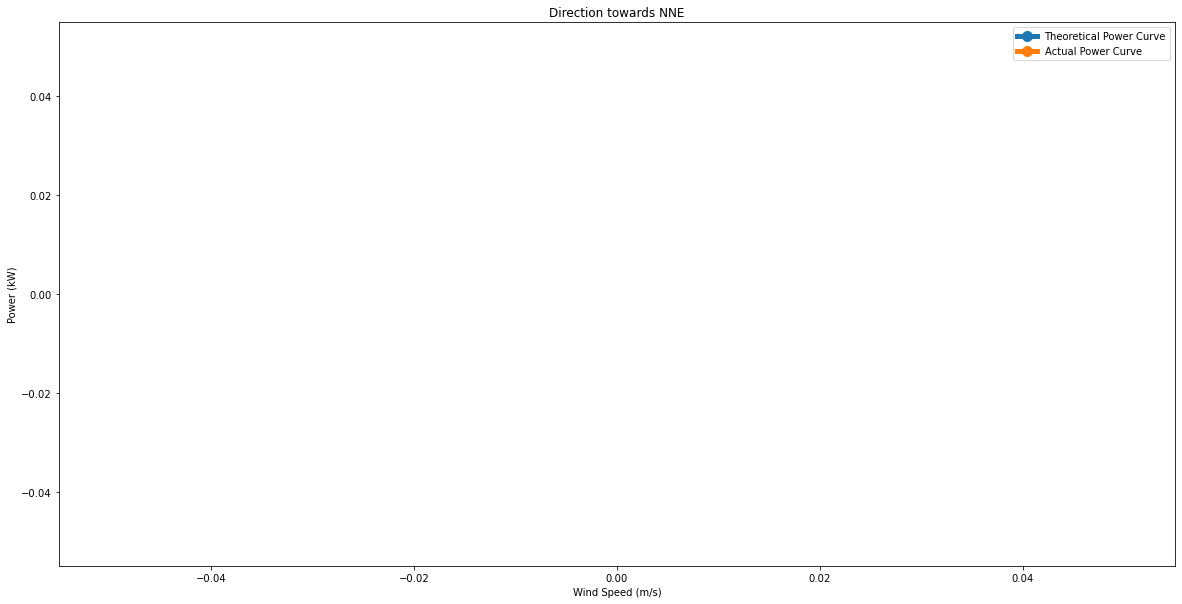

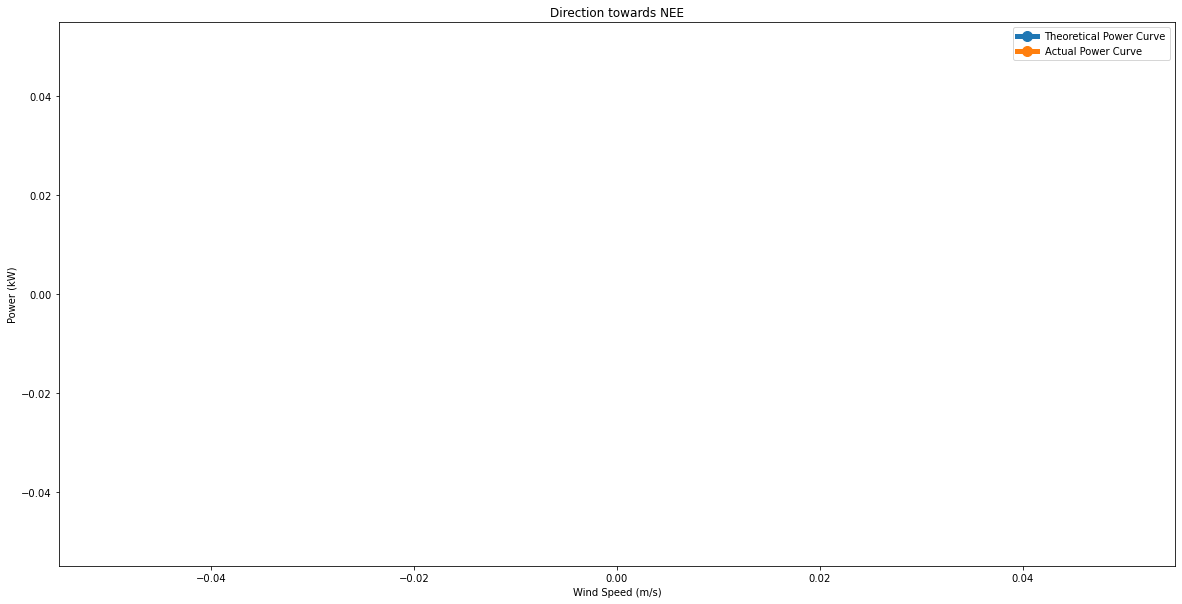

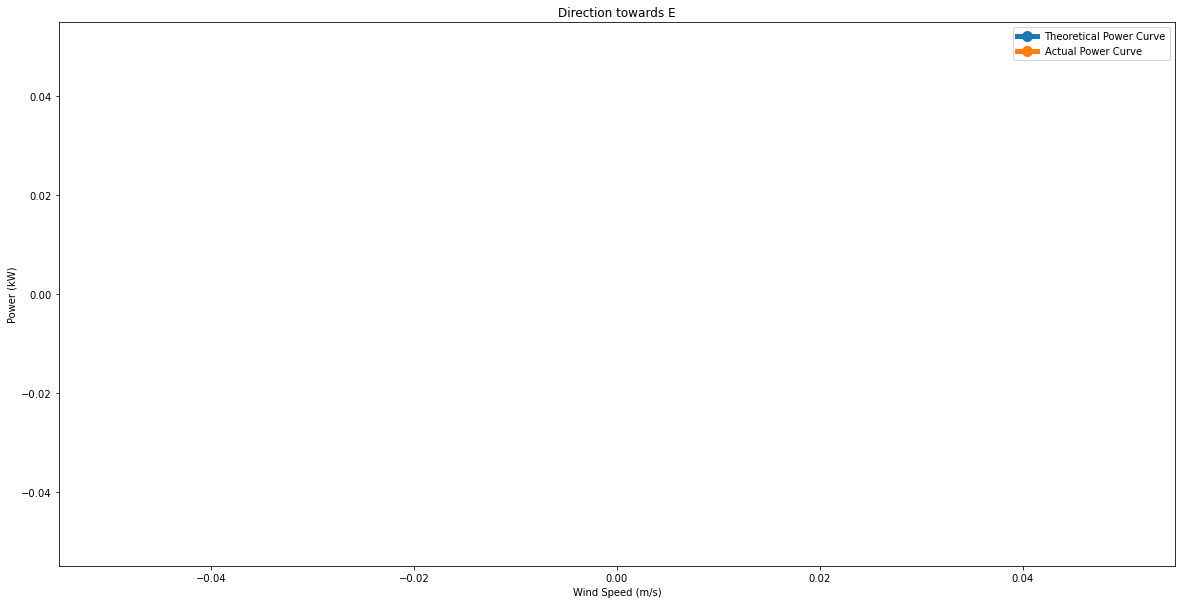

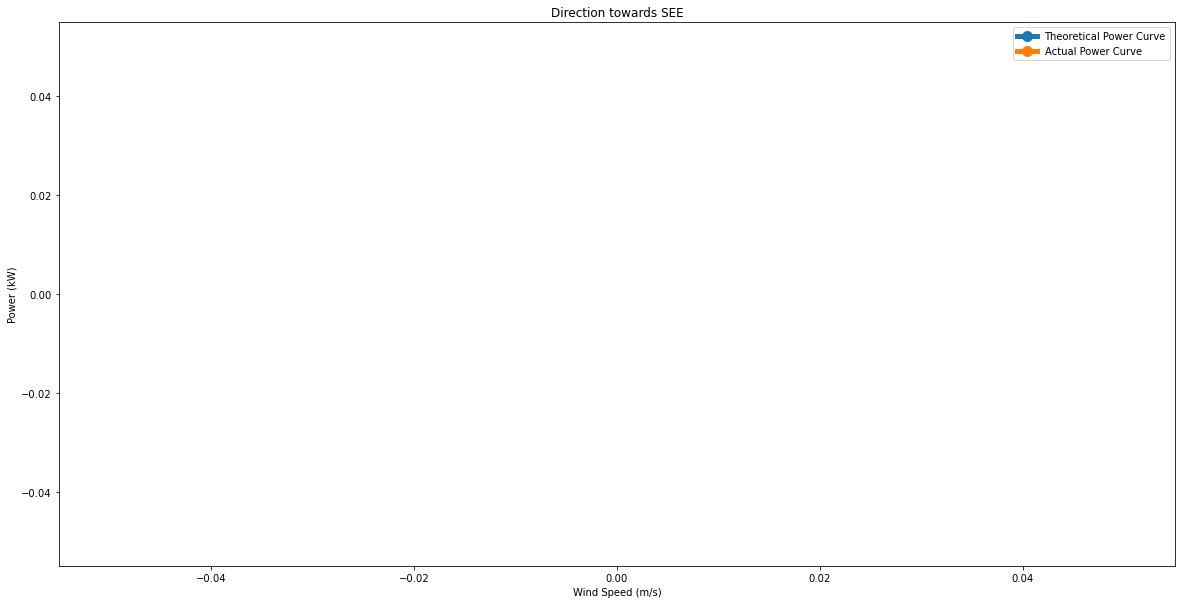

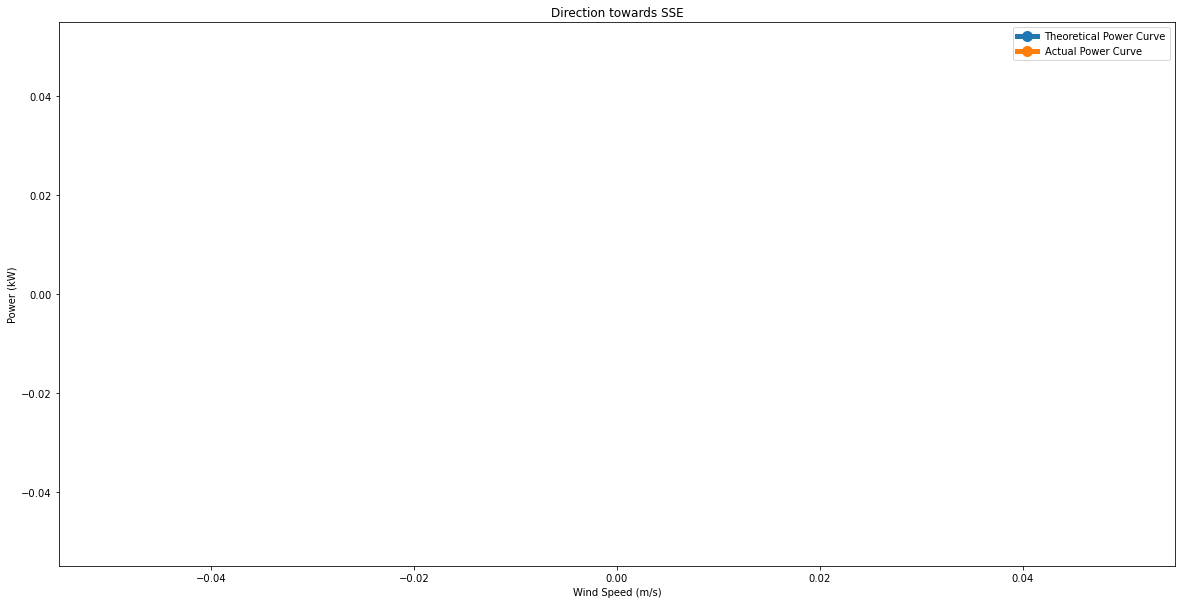

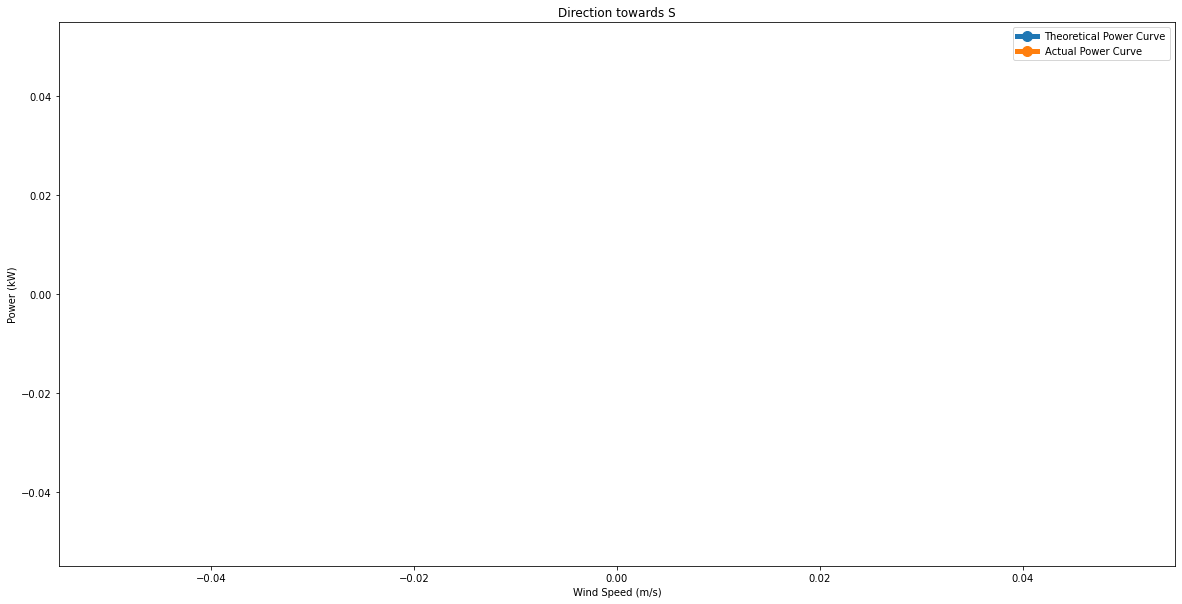

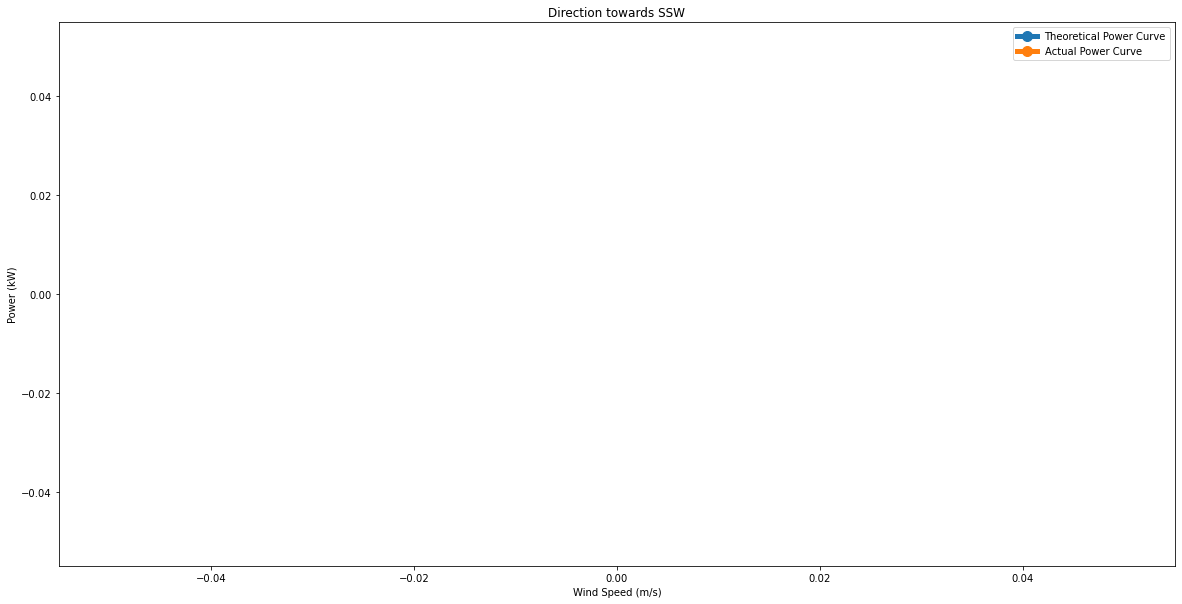

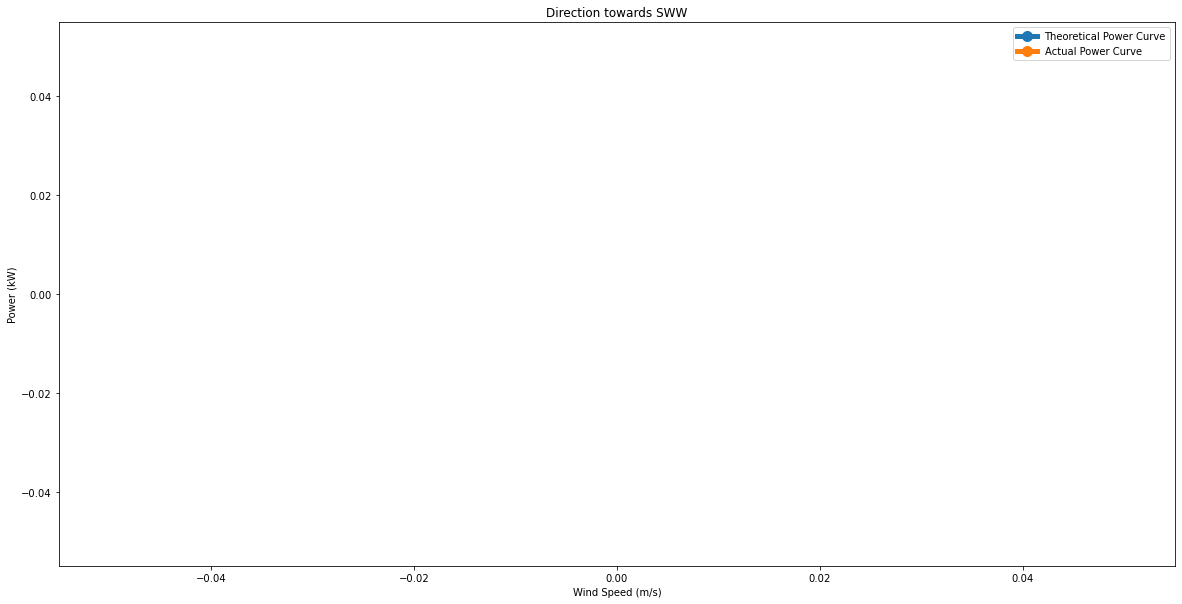

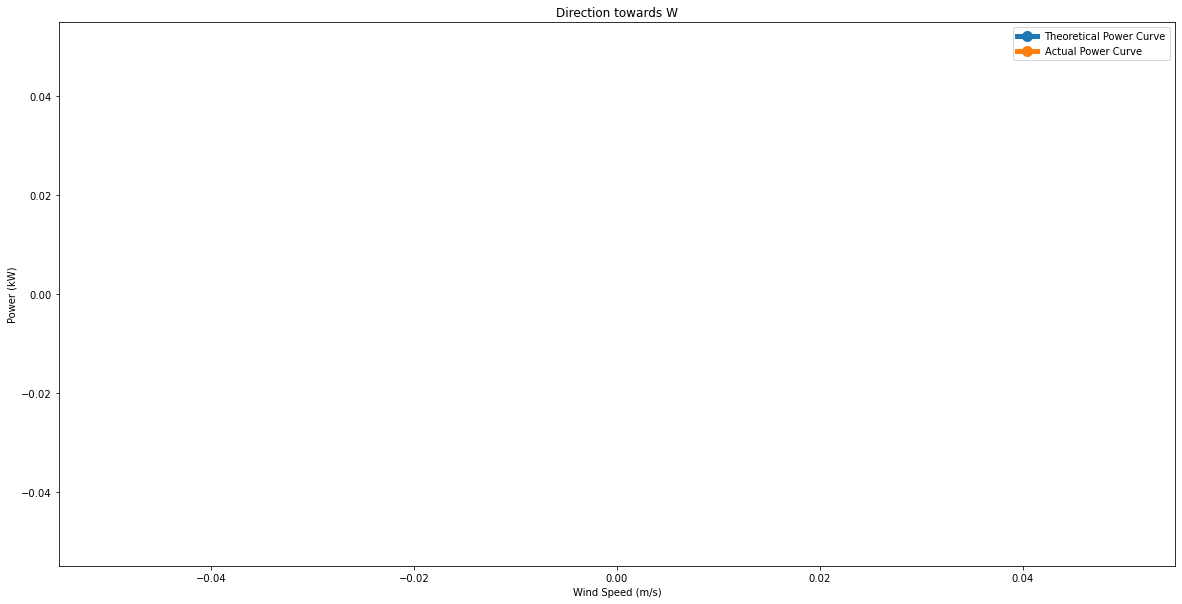

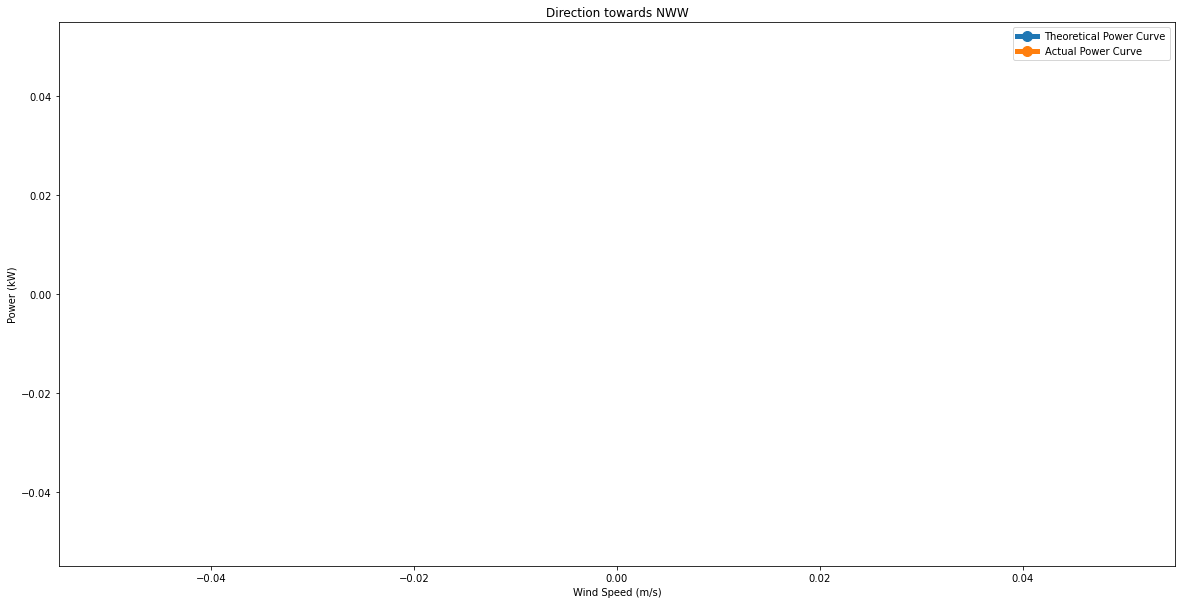

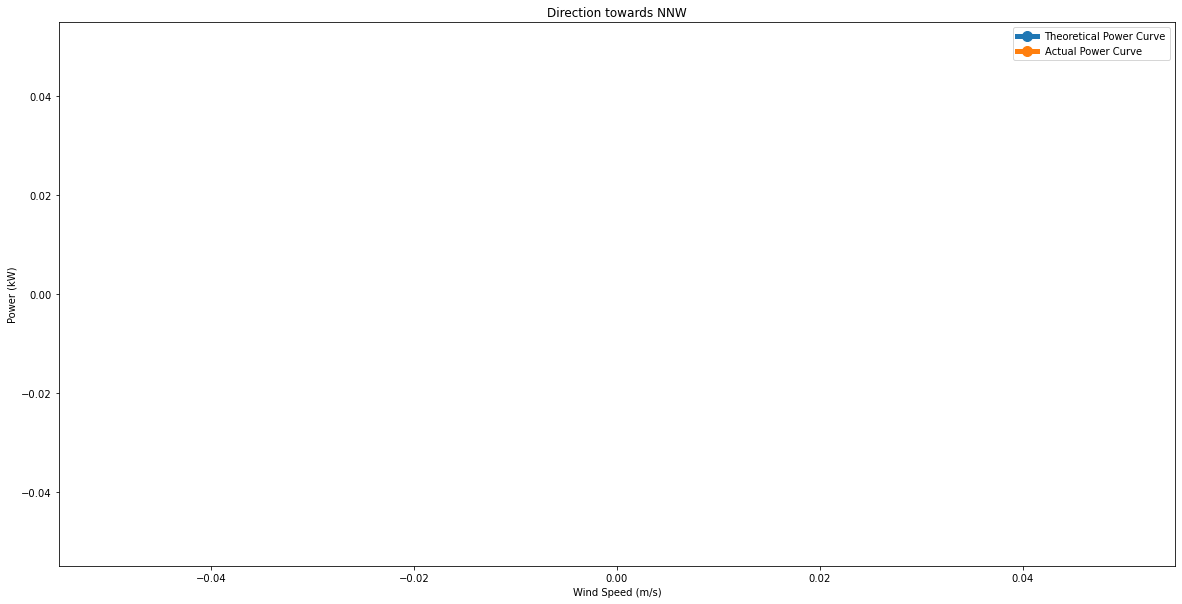

In [20]:
for i in range(0,12):
    graph_T(i)

In [21]:
X = data[[ 'WindDirection', 'month', 'day', 'Hour', 'meanSpeed']]

In [22]:
X

,WindDirection,month,day,Hour,meanSpeed
0,259.994904,1,1,0,5.5
1,268.641113,1,1,0,5.5
2,272.564789,1,1,0,5.0
3,271.258087,1,1,0,5.5
4,265.674286,1,1,0,5.5
...,...,...,...,...,...
50525,80.502724,12,31,23,11.5
50526,84.062599,12,31,23,7.5
50527,84.742500,12,31,23,8.5
50528,84.297913,12,31,23,9.5


In [23]:
y = data['ActivePower(kW)']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
import joblib

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [26]:
lasso = Lasso(alpha = 0.01)
model = lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

Training RMSE and R2 score:
533.8827541152458
0.834908161147255
Testing RMSE and R2 score:
539.8257889435563
0.829215337935233


In [27]:
print(*model.predict([[270,1,1,23,5.5]]))


745.2822237012497


In [29]:
joblib.dump(model,'power.pkl')


['power.pkl']